In [58]:
import numpy as np
import pandas as pd
import missingno
import sklearn
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.utils import shuffle
import pickle
import matplotlib.pyplot as pyplot
from matplotlib import style

In [59]:
df = pd.read_csv('C:\sagar\student-mat.csv', sep=';')

In [60]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [61]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [62]:
df.shape

(395, 33)

In [63]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


<AxesSubplot:>

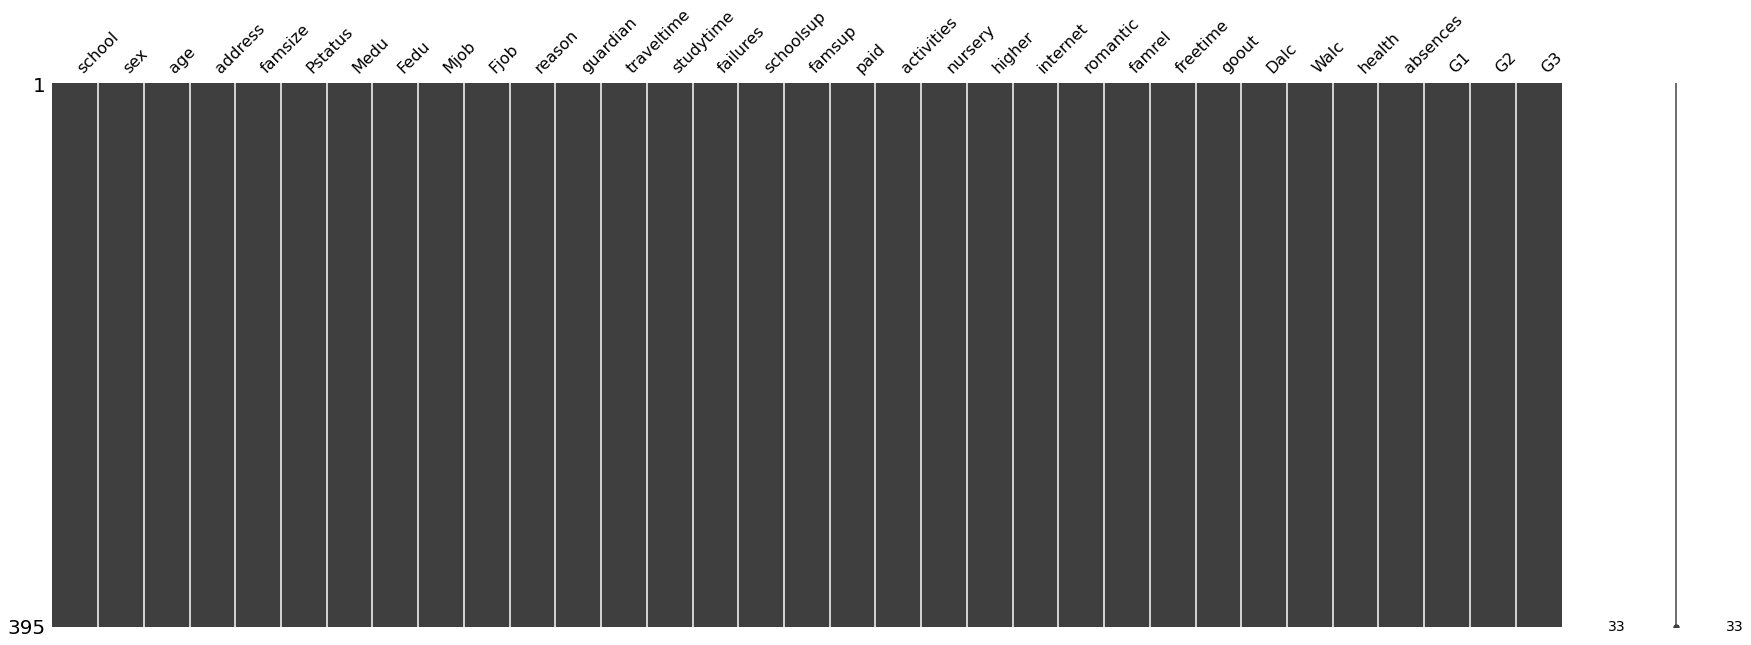

In [64]:
missingno.matrix(df, figsize = (30,10))

C:\Users\91705\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.7326723530443435

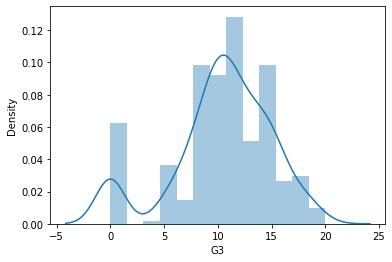

In [65]:
sns.distplot(df['G3'])
df['G3'].skew()

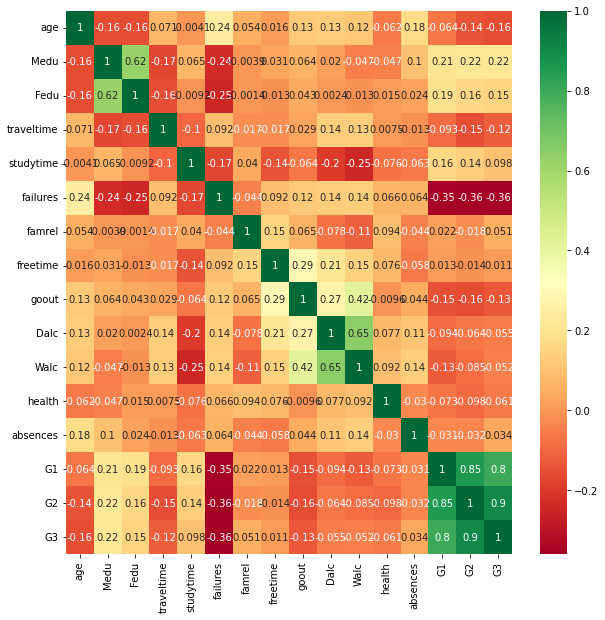

In [66]:
data = df[['G3']]
pyplot.figure(figsize=(10,10))
g = sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")


In [67]:
data2 = df[['absences', 'G1', 'G2','studytime', 'famrel', 'Medu', 'Fedu']]

In [68]:
x = np.array(data2)

y = np.array(data)

In [69]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size= 0.1)

In [70]:
best_score = 0

In [71]:
for i in range(50):

    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size= 0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train,y_train)
    accuracy = linear.score(x_test, y_test)

    #print(accuracy)
    if accuracy>best_score:
        best_score = accuracy
        with open("model1.pickle", "wb")as f:
            pickle.dump(linear, f)
print("best outcome is " + str(best_score))

best outcome is 0.9387698574220716


In [72]:
pickle_in = open("model1.pickle", "rb")
linear = pickle.load(pickle_in)

In [73]:
#Prediction
predictions = linear.predict(x_test)
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

[15.51368077] [11 16 15  2  4  3  4] [15]
[17.47378951] [ 0 17 17  4  5  3  2] [18]
[12.13689046] [ 0 15 12  3  4  4  2] [14]
[19.07491345] [ 6 18 18  1  4  2  1] [18]
[12.59701325] [ 0 13 13  3  4  4  4] [13]
[8.54598824] [6 9 9 2 4 4 3] [10]
[11.97013435] [16 10 12  2  4  4  4] [11]
[10.1460359] [ 0 11 11  3  4  3  4] [10]
[8.12119157] [2 7 9 1 4 1 1] [8]
[8.69784609] [ 0  7 10  3  4  3  3] [10]
[11.77296126] [ 6 13 12  3  4  1  1] [12]
[9.53413564] [ 4  8 10  2  5  3  3] [10]
[8.56093194] [6 9 9 1 4 1 1] [10]
[18.76929957] [ 2 19 18  2  4  4  4] [18]
[9.46636845] [ 0 10 10  2  4  4  3] [10]
[9.10530532] [ 0  7 10  2  5  3  4] [11]
[10.01190941] [ 0  8 11  2  4  1  1] [11]
[5.36272496] [0 7 6 1 5 1 1] [0]
[-1.16098734] [0 5 0 1 4 3 2] [0]
[16.44376398] [ 2 15 16  2  4  4  2] [16]
[3.86473448] [0 6 5 1 4 1 1] [0]
[-1.22686471] [0 6 0 2 4 2 1] [0]
[7.63315529] [ 0 10  9  2  2  4  4] [0]
[11.80503943] [ 0 11 12  1  4  3  2] [10]
[14.78940987] [ 2 16 15  2  3  1  2] [15]
[19.66846694] [2

In [74]:
np.sqrt(metrics.mean_squared_error(y_test[x], predictions[x]))

2.6201827144264005

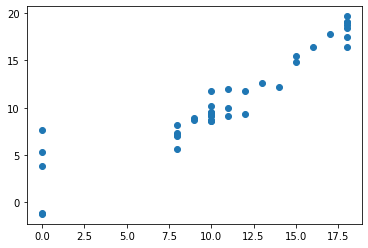

In [75]:
pyplot.scatter(y_test, predictions)

In [76]:
predictions = linear.predict([[23, 17, 15 , 2 , 5 , 1 , 1]])
print(predictions)

[[16.56635866]]
